# Blockly Trial Map Generator

In this notebook, we will generate trial maps for the experiment

In [1]:
# import modules
import numpy as np
import sys
sys.path.append("../src/") # go to source dir


In [2]:
# import classes and functions
from utils import showLevelWithAgentPNG, showLevelPNGMark
from trial import Trial


# Trials Map Generator

| Trials      | path length |
|-------------|-------------|
| 1           | 1           |
| 2           | 2           |
| 3           | 3           |
| 4           | 4           |
| 5, 6, 7, 8  | 4           |
| 9,10,11,12  | 6           |
| 13,14,15,16 | 8           |
| 17,18,19,20 | 10          |
| 21,22,23,24 | 12          |


In [3]:
# generate a trial
trial = Trial(id=13)

[[(7, 9), (7, 8), (7, 7), (7, 6), (7, 5), (6, 5), (5, 5), (4, 5), (3, 5), (3, 4), (3, 3), (4, 3), (5, 3), (5, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]]


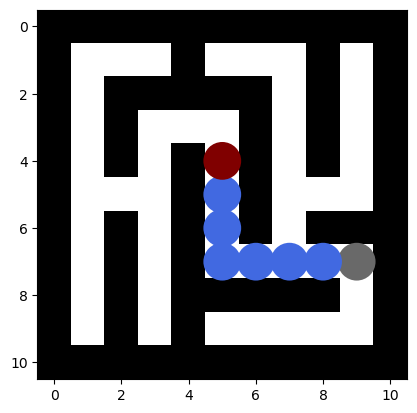

In [4]:
# show the trial map
showLevelWithAgentPNG(trial.maze, trial.agent.path)

In [5]:
# show the json representation of the trial
trial.to_json()

'{"trial_id": 13, "maze": [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1], [1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1], [1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1], [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1], [1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1], [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1], [1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1], [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], "agent": {"agent_id": 13, "path": [[7, 9], [7, 8], [7, 7], [7, 6], [7, 5], [6, 5], [5, 5], [4, 5]], "rewards": [10, 11, 12, 13, 14, 15, 16, 17]}}'

# Generate an experiment of 25 trials

```python

In [6]:
# Generate a sample experiment with 20 trials
from experiment import Experiment
experiment = Experiment(trials=24)
experiment.generate_trials()

[[(9, 3), (8, 3), (7, 3), (6, 3), (5, 3), (4, 3), (3, 3), (2, 3), (1, 3)]]
[[(9, 1), (9, 2), (9, 3), (8, 3), (7, 3), (6, 3), (5, 3), (5, 4), (5, 5), (4, 5), (3, 5), (3, 6), (3, 7), (4, 7), (5, 7), (6, 7), (7, 7), (7, 8), (7, 9), (6, 9), (5, 9), (4, 9), (3, 9)]]
[[(9, 5), (8, 5), (7, 5), (6, 5), (5, 5), (4, 5), (3, 5), (2, 5), (1, 5), (1, 6), (1, 7)]]
[[(5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]]
[[(9, 1), (8, 1), (7, 1), (6, 1), (5, 1), (5, 2), (5, 3), (4, 3), (3, 3), (2, 3), (1, 3)]]
[[(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (6, 5), (7, 5), (7, 6), (7, 7), (8, 7), (9, 7), (9, 8), (9, 9), (8, 9), (7, 9)]]
[[(1, 9), (1, 8), (1, 7), (1, 6), (1, 5), (1, 4), (1, 3), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3), (9, 2), (9, 1)]]
[[(1, 3), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (8, 7), (9, 7), (9, 8), (9, 9)]]
[[(9, 3), (9, 4), (9, 5), (8, 5)

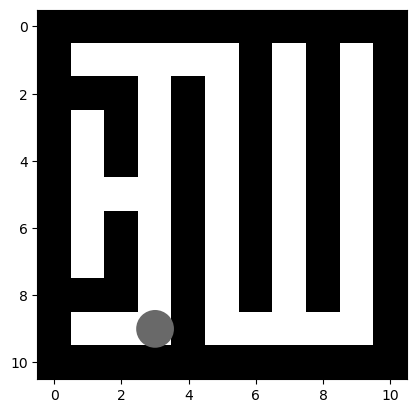

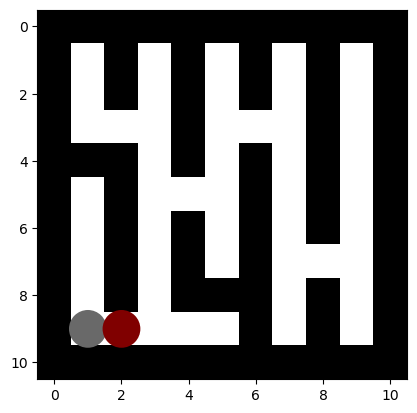

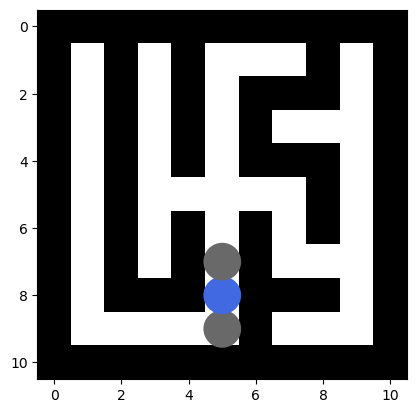

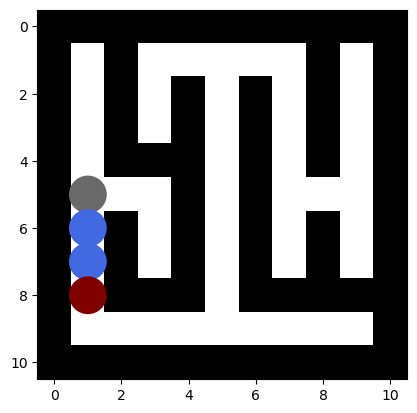

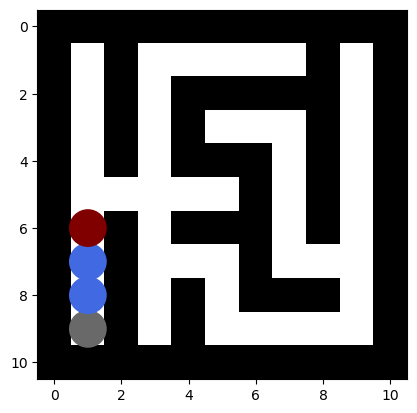

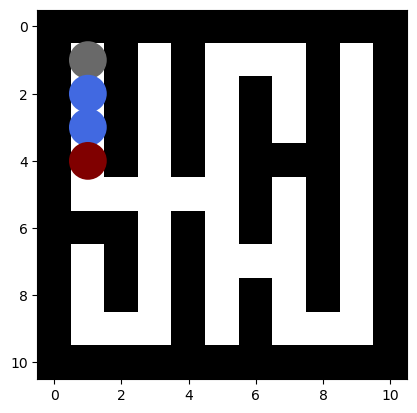

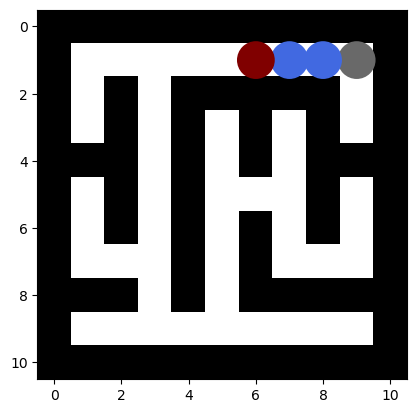

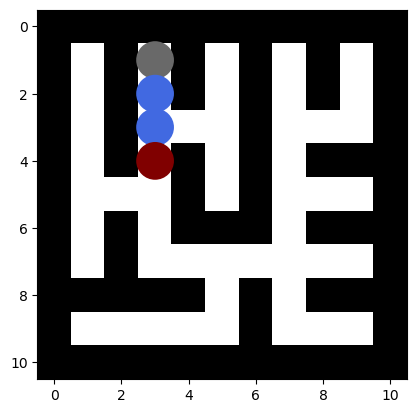

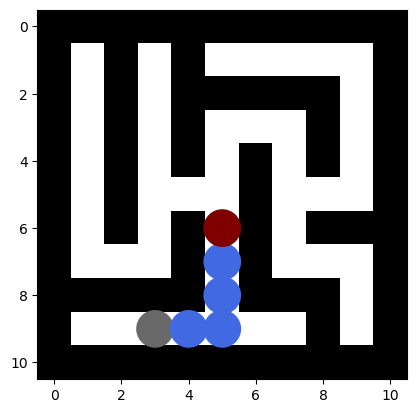

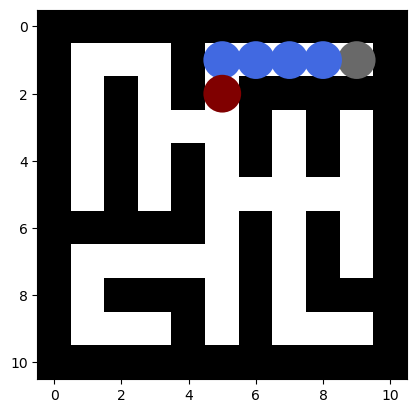

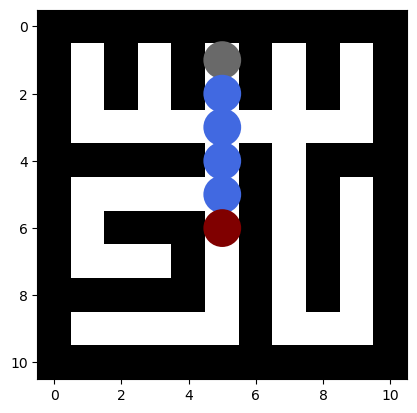

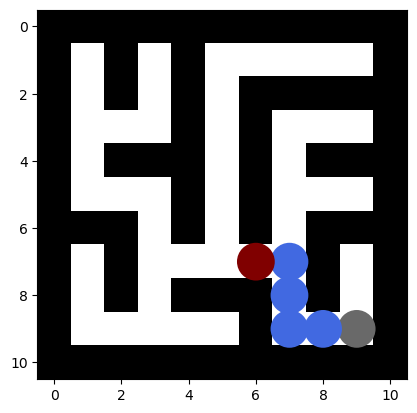

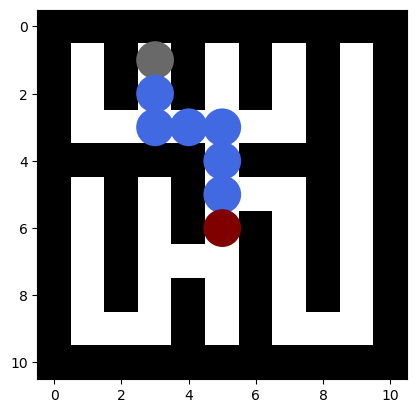

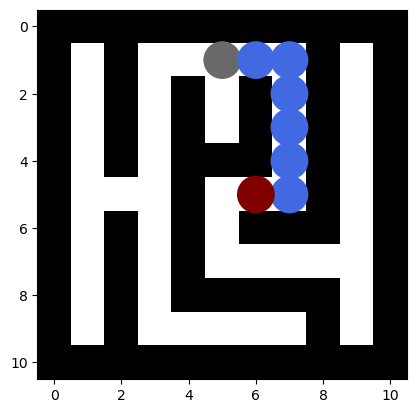

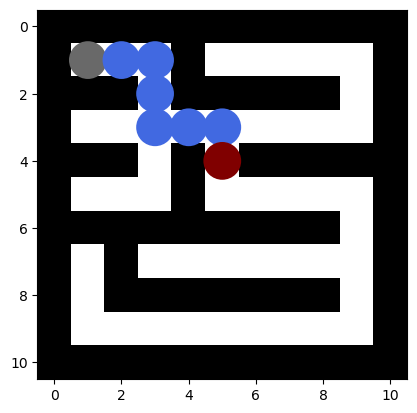

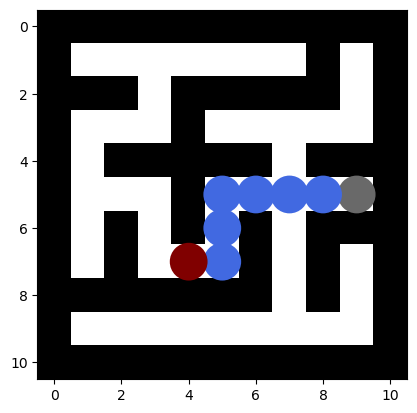

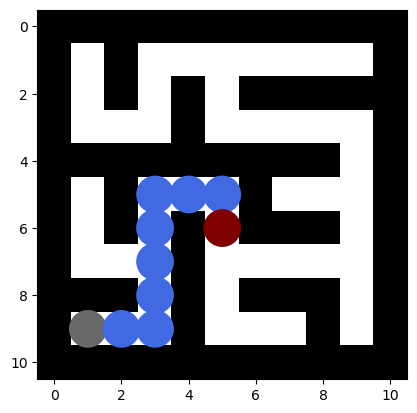

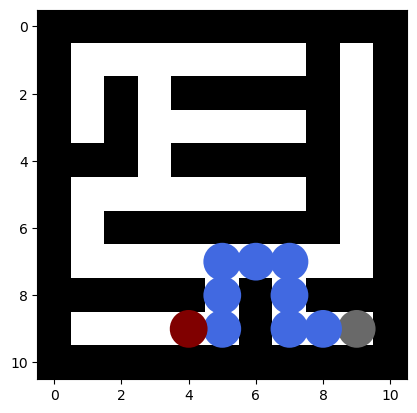

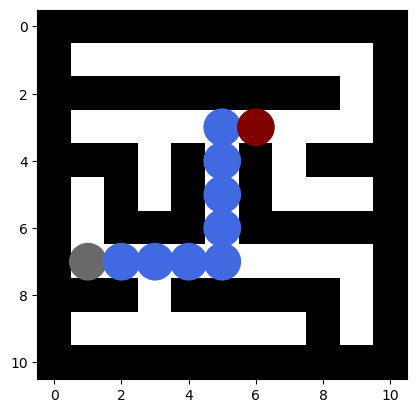

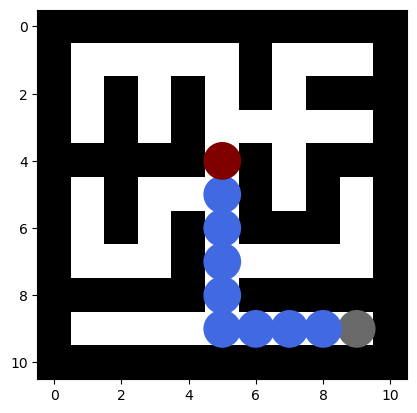

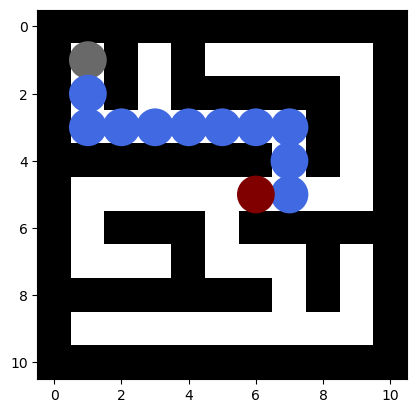

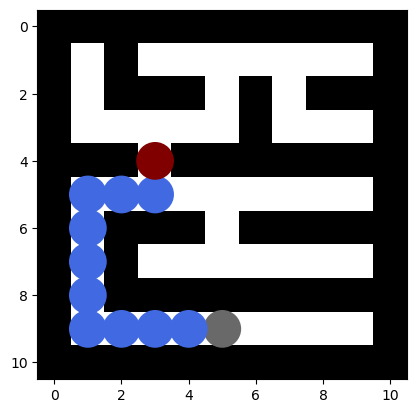

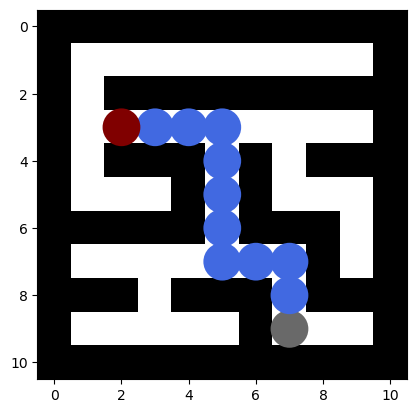

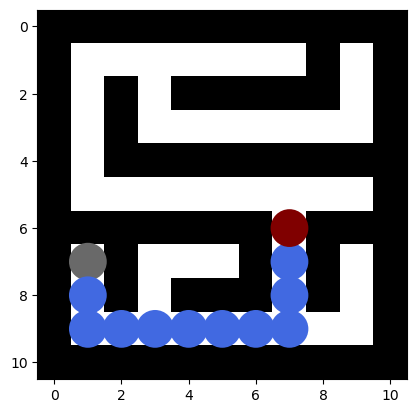

In [7]:
experiment.show_trial_maps()

In [8]:
experiment.save_to_file()